Exercise 6 Task 1

Iteration 0: Weights: [0.00043218], Bias: 1.1102230246251566e-21, Error Mean: 2.2657612747452172e-18, Error Std: 1.0
Iteration 1000: Weights: [0.34199026], Bias: 5.9063864910058356e-18, Error Mean: 3.172065784643304e-17, Error Std: 0.7169223038697683
Iteration 2000: Weights: [0.55121262], Bias: 1.4441781104324058e-17, Error Mean: 2.0391851472706958e-17, Error Std: 0.5758574394236426
Iteration 3000: Weights: [0.67937238], Bias: 2.351452366156076e-17, Error Mean: 1.8126090197961738e-17, Error Std: 0.513014930396929
Iteration 4000: Weights: [0.757877], Bias: 2.893463246778064e-17, Error Mean: 2.2657612747452175e-17, Error Std: 0.4873488449024952
Iteration 5000: Weights: [0.80596522], Bias: 3.357425448768911e-17, Error Mean: 2.0391851472706958e-17, Error Std: 0.4773624826710461
Iteration 6000: Weights: [0.8354218], Bias: 3.9456216072153233e-17, Error Mean: 1.1328806373726087e-17, Error Std: 0.47356105971475443
Iteration 7000: Weights: [0.85346551], Bias: 4.462430425178328e-17, Error Mean: 

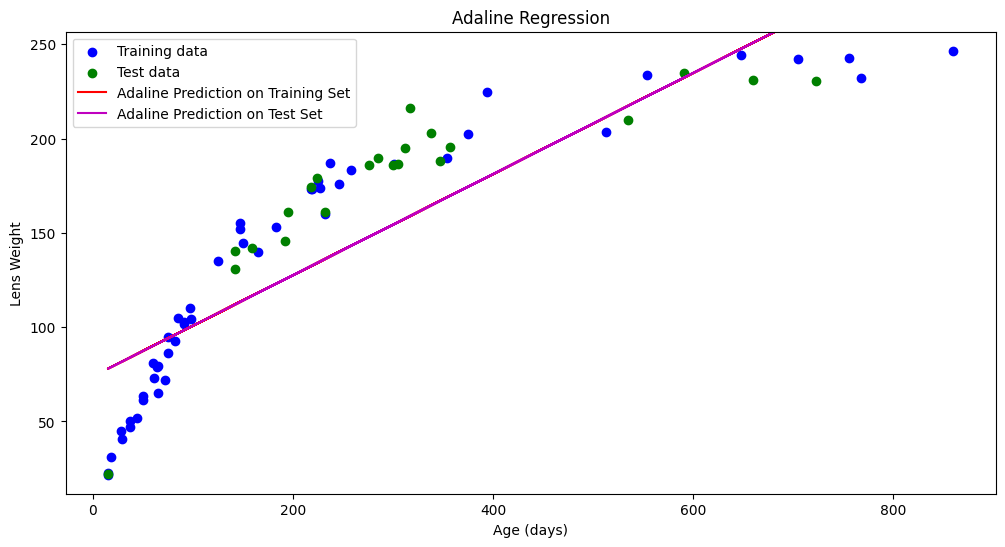

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data function
def load_data(filename):
    data = pd.read_csv(filename, header=None, sep="\s+")
    data.columns = ['Age', 'LensWeight']
    X = data['Age'].values.reshape(-1, 1)  # Reshape for a single feature
    y = data['LensWeight'].values
    return X, y

# Normalize the data
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized, mean, std

# De-normalize the data
def denormalize(X_normalized, mean, std):
    return X_normalized * std + mean

# Initialize parameters
def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

# Fit the Adaline model
def fit(X, y, learning_rate, n_iters):
    n_samples, n_features = X.shape
    weights, bias = initialize_parameters(n_features)
    for i in range(n_iters):
        linear_output = np.dot(X, weights) + bias
        errors = y - linear_output

        # Check for NaN or Inf in errors
        if np.any(np.isnan(errors)) or np.any(np.isinf(errors)):
            print(f'NaN or Inf detected in errors at iteration {i}')
            break

        weights_update = learning_rate * np.dot(X.T, errors)
        bias_update = learning_rate * np.sum(errors)

        # Check for NaN or Inf in updates
        if np.any(np.isnan(weights_update)) or np.any(np.isinf(weights_update)):
            print(f'NaN or Inf detected in weights update at iteration {i}')
            break
        if np.isnan(bias_update) or np.isinf(bias_update):
            print(f'NaN or Inf detected in bias update at iteration {i}')
            break

        weights += weights_update
        bias += bias_update

        # Print intermediate values to monitor training
        if i % 1000 == 0:
            print(f'Iteration {i}: Weights: {weights}, Bias: {bias}, Error Mean: {np.mean(errors)}, Error Std: {np.std(errors)}')

    return weights, bias

# Predict using the trained model
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

# Load and prepare data
X, y = load_data('rabbit_data.txt')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Normalize the data
X_train_normalized, X_train_mean, X_train_std = normalize(X_train)
y_train_normalized, y_train_mean, y_train_std = normalize(y_train.reshape(-1, 1))
X_test_normalized = (X_test - X_train_mean) / X_train_std  # Normalize test set using training set mean and std

# Fit the model
learning_rate = 0.00001
n_iters = 10000
weights, bias = fit(X_train_normalized, y_train_normalized.flatten(), learning_rate, n_iters)

# Debugging prints to check the weights and bias after training
print("Final Weights:", weights)
print("Final Bias:", bias)

# Predict the values for both training and test sets
train_predictions_normalized = predict(X_train_normalized, weights, bias)
test_predictions_normalized = predict(X_test_normalized, weights, bias)

# De-normalize the predictions
train_predictions = denormalize(train_predictions_normalized, y_train_mean, y_train_std)
test_predictions = denormalize(test_predictions_normalized, y_train_mean, y_train_std)  # Use training mean and std for consistency

# Calculate training and test errors
train_error = mean_squared_error(y_train, train_predictions)
test_error = mean_squared_error(y_test, test_predictions)

print(f"Training Error: {train_error}")
print(f"Test Error: {test_error}")

# Ensure data is sorted for plotting
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
predictions_sorted = test_predictions[np.argsort(X_test[:, 0])]

# Debugging prints to check the sorted values and predictions
print("X Sorted:\n", X_sorted[:10])
print("Predictions Sorted:\n", predictions_sorted[:10])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_train, train_predictions, 'r-', label='Adaline Prediction on Training Set')
plt.plot(X_test, test_predictions, 'm-', label='Adaline Prediction on Test Set')
plt.title('Adaline Regression')
plt.xlabel('Age (days)')
plt.ylabel('Lens Weight')
plt.ylim([min(y) - 10, max(y) + 10])  # Adjust y-axis limits
plt.legend()
plt.show()


# Do you think the prediction results are good, and why / why not?

originally the fitted line went off the graph so the fitted line deviated significantly from the actual data points.I normalized input data and target values and then denormalized the predictions so that 'prediction_sorted' values would to match the original data. This made the plot to more readable.

After sclaing the fitted line follows the general trend of the actual data points well so based on that the prediction result are good.



Exercise 6 Task 2

In [6]:
pip install numpy pandas matplotlib scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Error: 1608.29147297889
Test Error: 2826.408179630648


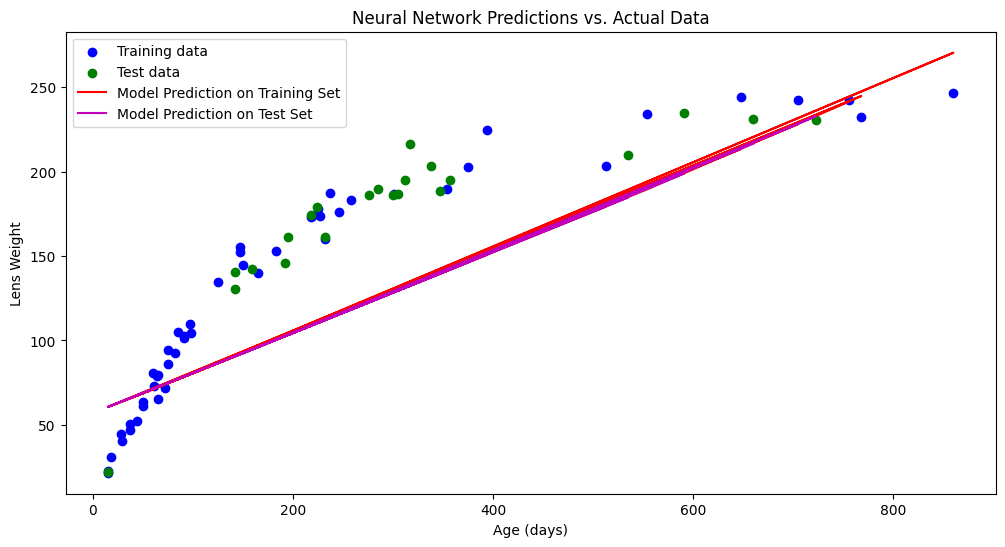

Non-linear Regression Test Error: 2338.2021938453768


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10,), max_iter=100, random_state=1)

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Load data
def load_data(filename):
    data = pd.read_csv(filename, header=None, sep="\s+")
    data.columns = ['Age', 'LensWeight']
    return data

data = load_data('rabbit_data.txt')
X = data[['Age']].values
y = data['LensWeight'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=1)
mlp.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error

# Predictions
train_pred = mlp.predict(X_train_scaled)
test_pred = mlp.predict(X_test_scaled)

# Evaluate accuracy
train_error = mean_squared_error(y_train, train_pred)
test_error = mean_squared_error(y_test, test_pred)

print(f"Training Error: {train_error}")
print(f"Test Error: {test_error}")

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_train, train_pred, 'r-', label='Model Prediction on Training Set')
plt.plot(X_test, test_pred, 'm-', label='Model Prediction on Test Set')
plt.title('Neural Network Predictions vs. Actual Data')
plt.xlabel('Age (days)')
plt.ylabel('Lens Weight')
plt.legend()
plt.show()


def nonlinear_regression_model(X):
    return 233.836 / (1 + np.exp(-0.002 * (X - 100)))

# Evaluation
nonlinear_pred = nonlinear_regression_model(X_test)
nonlinear_error = mean_squared_error(y_test, nonlinear_pred)
print(f"Non-linear Regression Test Error: {nonlinear_error}")
# Adjust the architecture and observe the training behavior
mlp_overfit = MLPRegressor(hidden_layer_sizes=(500,), max_iter=2000, random_state=1)
mlp_overfit.fit(X_train_scaled, y_train)  # Potentially overfitting

mlp_underfit = MLPRegressor(hidden_layer_sizes=(10,), max_iter=100, random_state=1)
mlp_underfit.fit(X_train_scaled, y_train)  # Potentially underfitting


# Train the NN on training set, and evaluate accuracy on training and testing set. Is this better than with Adaline? Visualize prediction results (draw data-points and the networks'predictions).

# Compare your neural network model against this model. Which one is better?

# Do you get lower prediction error? Was the training faster (required less iterations to reach same accuracy)? Why so?

**Adaline model**

Training Error: 1004.4885609883293

Test Error: 1138.9784658653277


**This model**

Training Error: 1608.29147297889

Test Error: 2826.408179630648

Non-linear Regression Test Error: 2338.2021938453768


Based on the training and test errors, the Adaline model is better than both the second model and the non-linear regression model for this specific dataset. The lower errors indicate that Adaline is more effective in capturing the relation ship between age and lens weight in the dataset.
